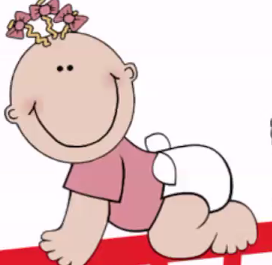

In [ ]:
# Association


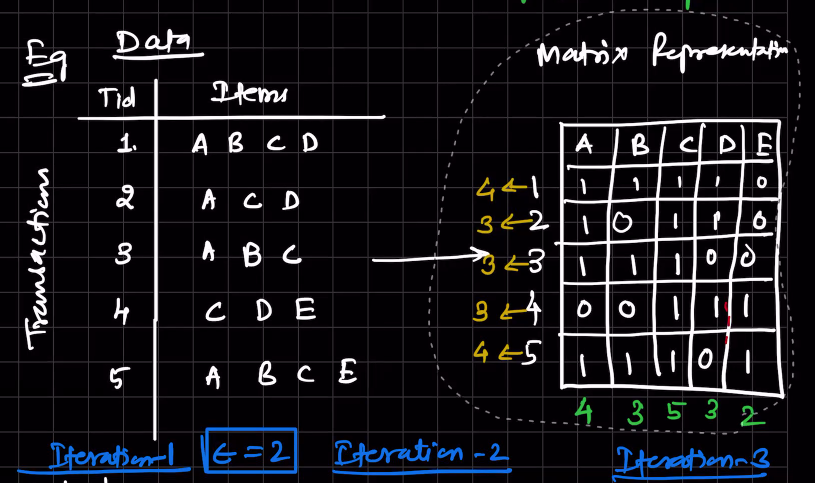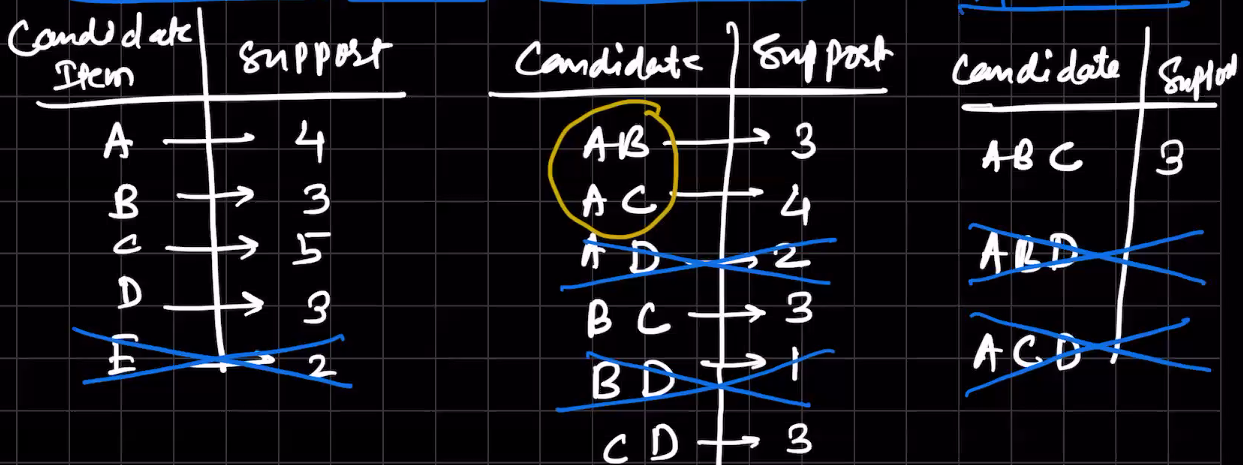
# Apriori Algorithm
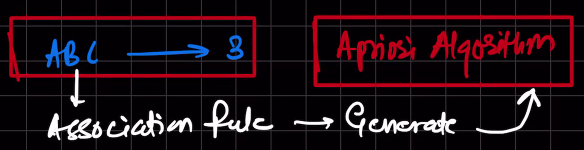

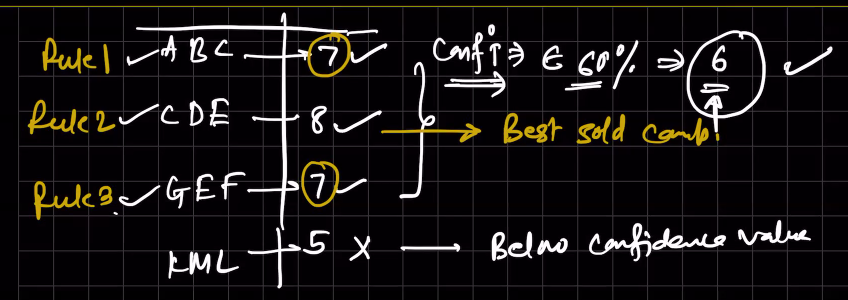

In [1]:
# Market Basket analysis, Web usage mining, continuous production

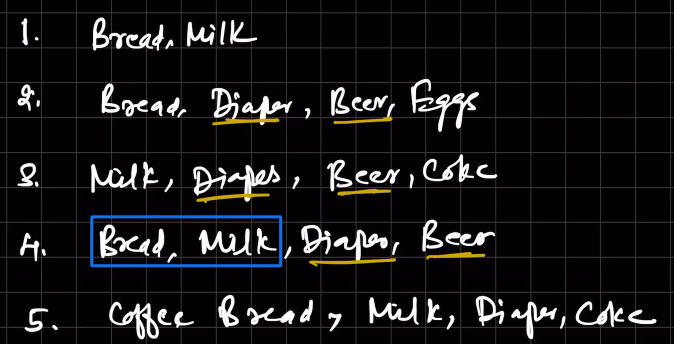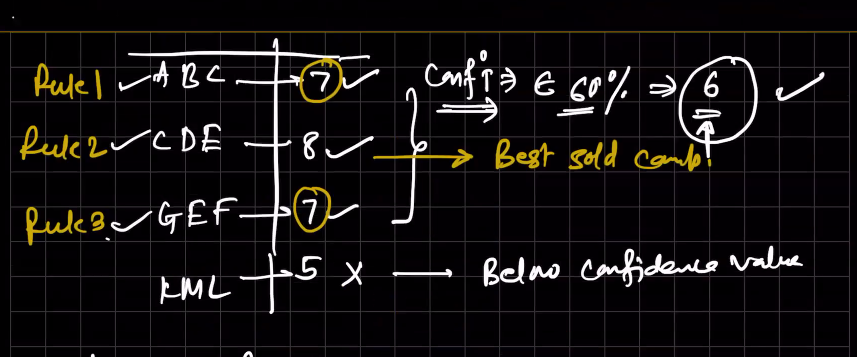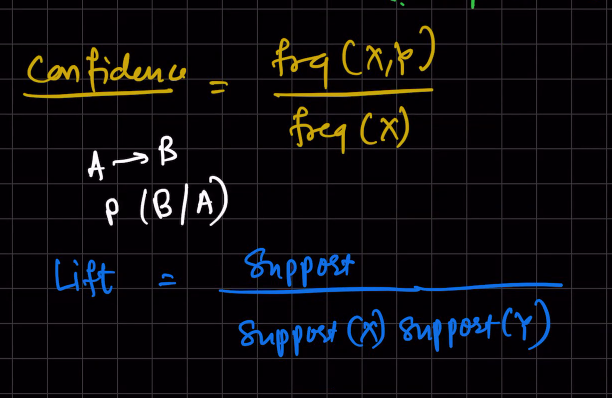

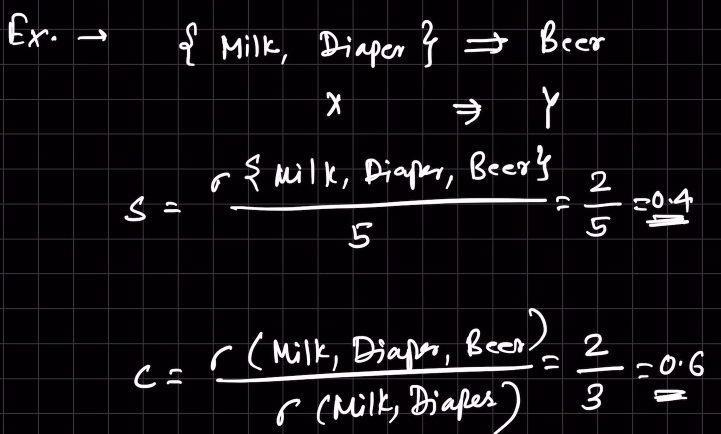

In [10]:
!pip install apyori
import pandas as pd,numpy as np

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=f475e4595d47e7ed8b1cf47a13e9e94b934b923299bad525a9fa9f17b26693c8
  Stored in directory: c:\users\zs283mz\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
df=pd.read_csv('Market_Basket.csv')
df

shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0             NaN              NaN  NaN            NaN          NaN   
1             NaN              NaN  NaN            NaN          NaN   
2             NaN              NaN  NaN            NaN          NaN   
3       green tea              NaN  NaN            NaN          NaN   
4             NaN              NaN  NaN            NaN          NaN   
...           ...              ...  ...            ...          ...   
7495          NaN              NaN  NaN            NaN          NaN   
7496    magazines        green tea  NaN            NaN          NaN   
7497          NaN              NaN  NaN            NaN          NaN   
7498          NaN              NaN  NaN            NaN          NaN   
7499          NaN              NaN  NaN            NaN          NaN   

     tomato juice low fat yogurt green tea honey salad mineral water salmon  \
0             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
1             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
2             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
3             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
4             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
...           ...            ...       ...   ...   ...           ...    ...   
7495          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7496          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7497          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7498          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7499          NaN            NaN       NaN   NaN   NaN           NaN    NaN   

     antioxydant juice frozen smoothie spinach  olive oil  
0                  NaN             NaN     NaN        NaN  
1                  NaN             NaN     NaN        NaN  
2                  NaN             NaN     NaN        NaN  
3                  NaN             NaN     NaN        NaN  
4                  NaN             NaN     NaN        NaN  
...                ...             ...     ...        ...  
7495               NaN             NaN     NaN        NaN  
7496               NaN             NaN     NaN        NaN  
7497               NaN             NaN     NaN        NaN  
7498               NaN             NaN     NaN        NaN  
7499               NaN             NaN     NaN        NaN  

[7500 rows x 20 columns]

In [4]:
df.shape

(7500, 20)

In [11]:
transactions=[]
for i in range(0,7500):
    transactions.append([str(df.values[i,j]) for j in range(0,20)])

In [12]:
transactions

[['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole wheat pasta',
  

In [18]:
# Train Model using Apriori Algorithm
from apyori import apriori
rules = apriori(transactions=transactions,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2,max_length=2)

In [19]:
results=list(rules)

In [20]:
len(results)

9

In [21]:
def inpesct(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultDataframe=pd.DataFrame(inpesct(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lifts'])

In [22]:
resultDataframe

Left Hand Side Right Hand Side   Support  Confidence     Lifts
0           light cream         chicken  0.004533    0.290598  4.843305
1  mushroom cream sauce        escalope  0.005733    0.300699  3.790327
2                 pasta        escalope  0.005867    0.372881  4.700185
3         fromage blanc           honey  0.003333    0.245098  5.178128
4         herb & pepper     ground beef  0.016000    0.323450  3.291555
5          tomato sauce     ground beef  0.005333    0.377358  3.840147
6           light cream       olive oil  0.003200    0.205128  3.120612
7     whole wheat pasta       olive oil  0.008000    0.271493  4.130221
8                 pasta          shrimp  0.005067    0.322034  4.514494

In [31]:
import matplotlib.pyplot as plt

# Date and Temperature

In [23]:
df=pd.read_csv('Temperature.csv')
df

Date  Temp
0     01-01-1981  20.7
1     02-01-1981  17.9
2     03-01-1981  18.8
3     04-01-1981  14.6
4     05-01-1981  15.8
...          ...   ...
3645  27-12-1990  14.0
3646  28-12-1990  13.6
3647  29-12-1990  13.5
3648  30-12-1990  15.7
3649  31-12-1990  13.0

[3650 rows x 2 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [25]:
df.describe()

Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000

In [33]:
pd(df['Date'])

TypeError: 'module' object is not callable

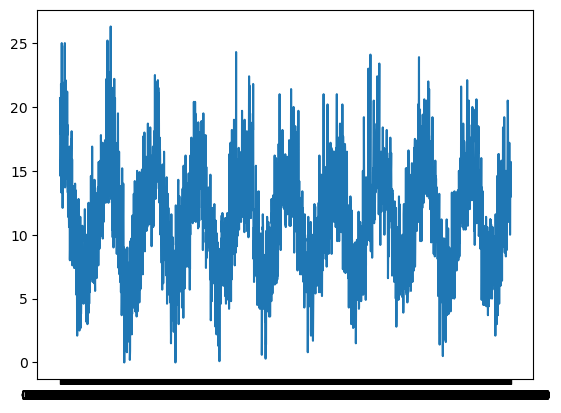

In [32]:
plt.plot(df['Date'],df['Temp'])

In [34]:
df['M12']=df['Temp'].rolling(12)

TypeError: object of type 'Rolling' has no len()

In [35]:
df['M12']

KeyError: 'M12'

In [36]:
plt.plot(df['Date'],df['M12'])

KeyError: 'M12'

In [37]:
#Extract month,from Data feature
df['Month']=[i.month for i in df['Date']]

AttributeError: 'str' object has no attribute 'month'

In [38]:
df['Month']

KeyError: 'Month'

In [39]:
#Extract month,from Data feature
df['Year']=[i.month for i in df['Date']]

AttributeError: 'str' object has no attribute 'month'

In [40]:
df.drop(['Date','M12'])

KeyError: "['Date', 'M12'] not found in axis"

In [41]:
df=df[['Srno','Year','Month','Temp']]
df

KeyError: "['Srno', 'Year', 'Month'] not in index"

In [ ]:
x=df.iloc[:,-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model1=model.fit(x_train,y_train)
model1

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
plt.plot(x_train,y_train,color='red')
plt.plot(X_train,model1.predict(x_train))

In [ ]:
plt.plot(X_train,y_train)
plt.plot(X_train,model1.predict(X_train))

# Time Series Analysis

1.Sequence of dates-(day,month,year)
2.TS analysis-analysis of data (came across units of time)
DD:MM:YYYY:==formal format
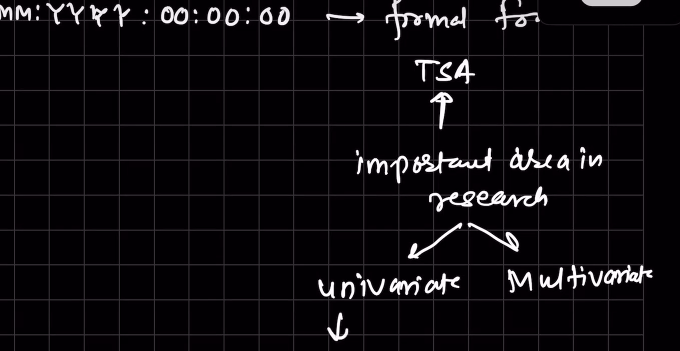
Time is one variable.
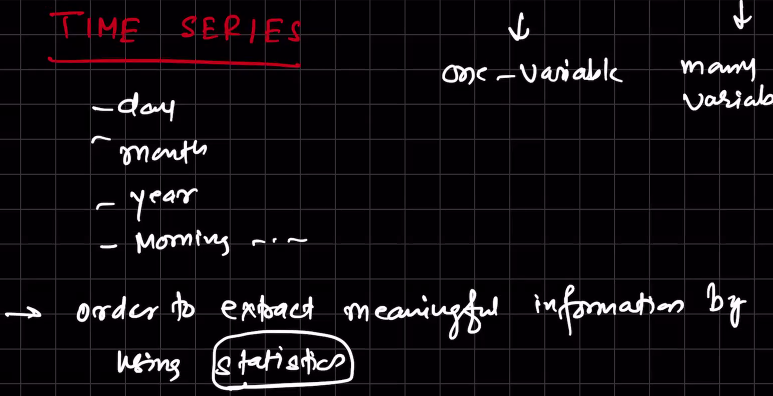
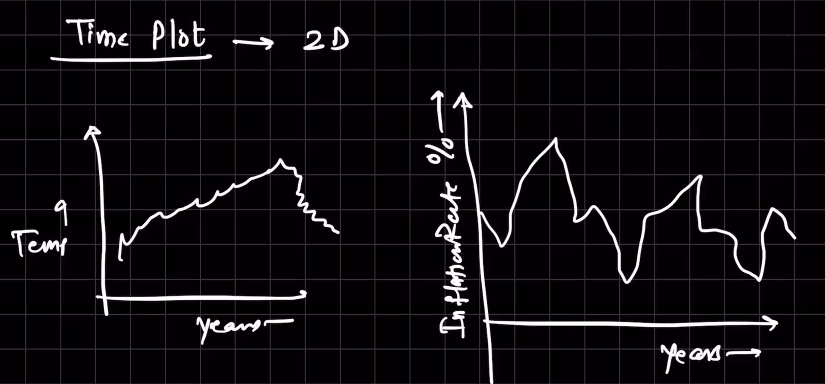
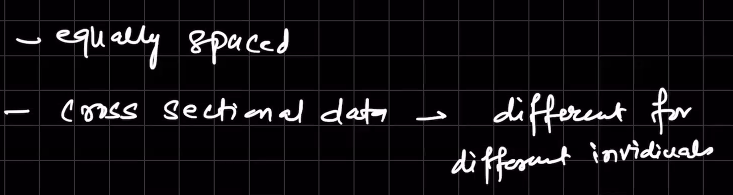
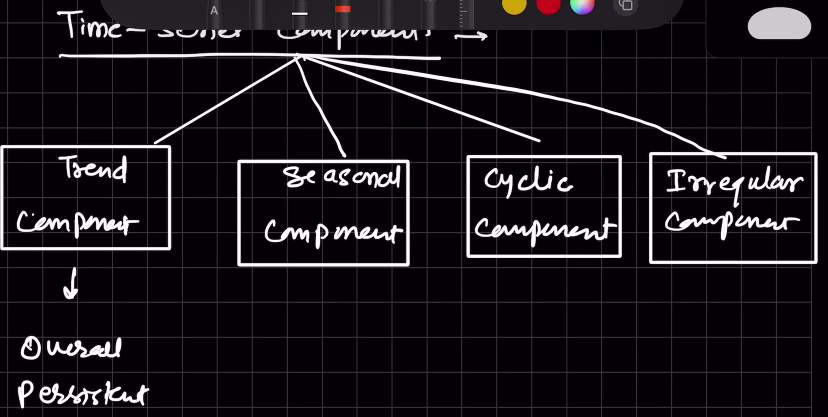
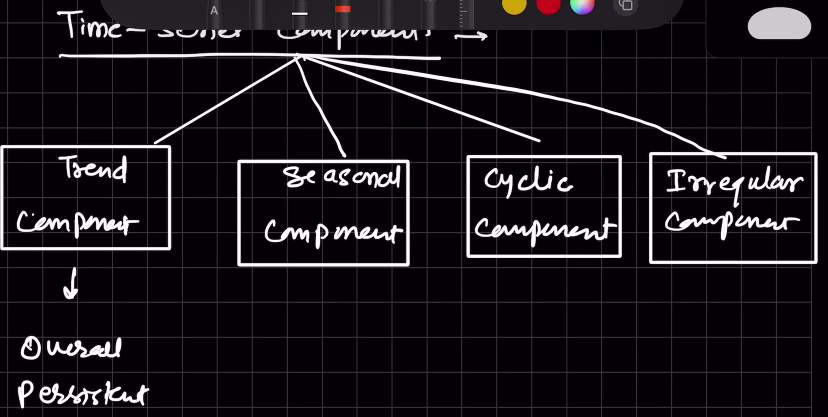
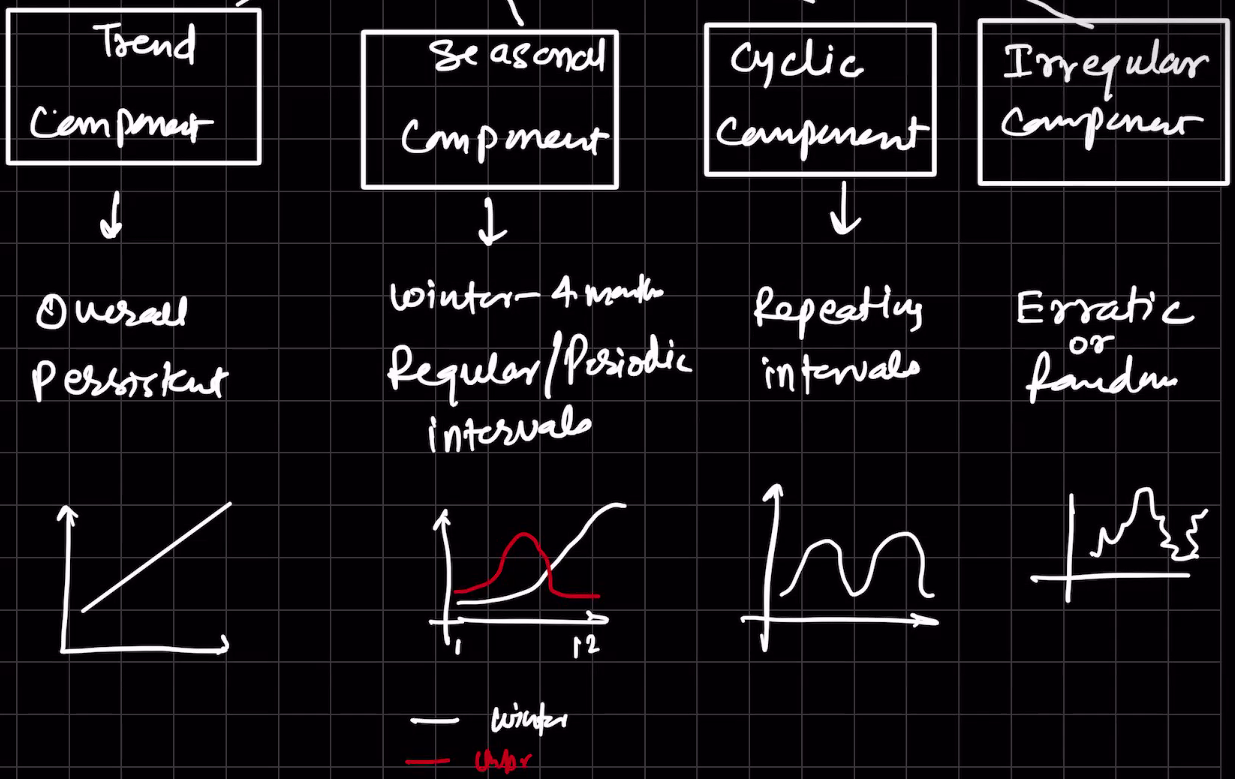
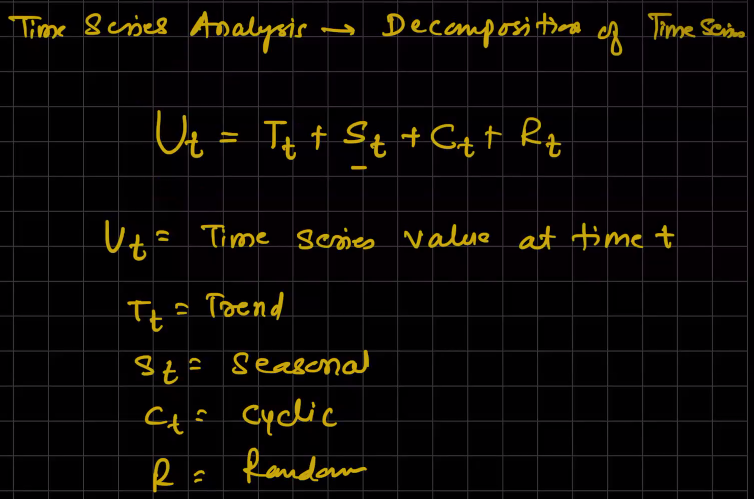
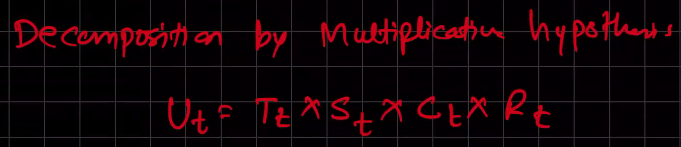
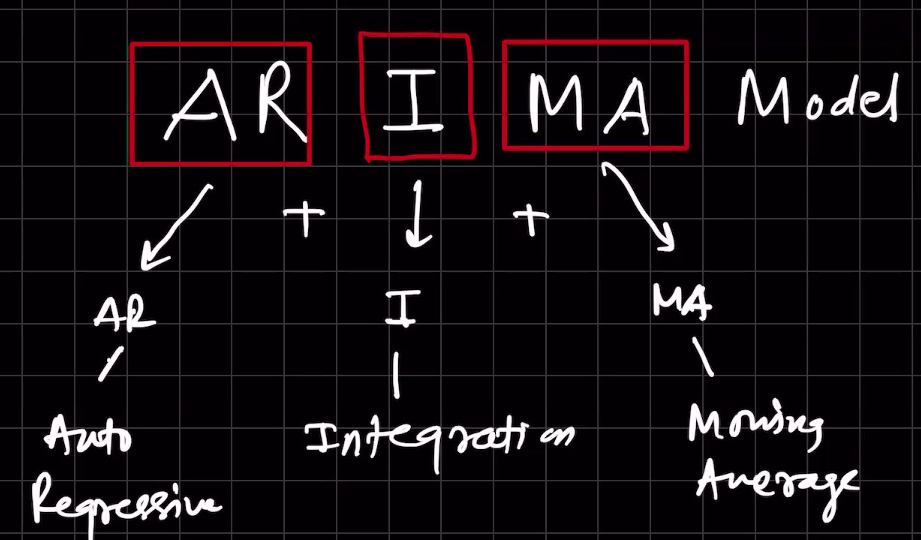
